![image](https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/notebooks/headers/watsonx-Prompt_Lab-Notebook.png)
# Use Watsonx to summarize legal Contracts documents.

**Note:** Please note that for the watsonx challenge, please run these notebooks locally on your laptop/desktop and do not run it in IBM Cloud.  The instructions for running the notebook locally are provided in the readme.md file present in the zip file.

This notebook contains the steps and code to demonstrate support of text summarization in Watsonx. It introduces commands for data retrieval and model testing.

Some familiarity with Python is helpful. This notebook uses Python 3.10.

<a id="setup"></a>
##  Set up the environment



### Install and import the dependecies

**Note:** For Windows environments, please remove `| tail -n 1` commands in the cell below.

In [1]:
!pip install rouge_score 
!pip install nltk 
!pip install matplotlib
!pip install ibm-watson-machine-learning==1.0.312 

**Note:** Please restart the notebook kernel to pick up proper version of packages installed above.

In [2]:
import os, getpass, json
from pandas import read_json
import matplotlib.pyplot as plt

### Watsonx API connection
This cell defines the credentials required to work with watsonx API for Foundation
Model inferencing.

**Action:** Provide the IBM Cloud user API key. For details, see
[documentation](https://cloud.ibm.com/docs/account?topic=account-userapikey&interface=ui).

In [3]:
credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": getpass.getpass("Please enter your WML api key (hit enter): ")
}

Please enter your WML api key (hit enter):  ········


### Defining the project id
The API requires project id that provides the context for the call. We will obtain the id from the project in which this notebook runs. Otherwise, please provide the project id.

**Hint**: You can find the `project_id` as follows. Open the prompt lab in watsonx.ai. At the very top of the UI, there will be `Projects / <project name> /`. Click on the `<project name>` link. Then get the `project_id` from Project's Manage tab (Project -> Manage -> General -> Details).


In [4]:
try:
    project_id = os.environ["PROJECT_ID"]
except KeyError:
    project_id = input("Please enter your project_id (hit enter): ")

Please enter your project_id (hit enter):  ad527a83-d416-4e49-9910-542b8b47f881


<a id="data"></a>
## Train/test data loading

Load train and test datasets. At first, training dataset (`train_data`) should be used to work with the models to prepare and tune prompt. Then, test dataset (`test_data`) should be used to calculate the metrics score for selected model, defined prompts and parameters.

In [5]:
filename_test = 'data/Summarisation/test.json'
filename_train = 'data/Summarisation/train.json'

test_data = read_json(filename_test).T[["original_text", "reference_summary"]]
train_data = read_json(filename_train).T[["original_text", "reference_summary"]]

In [6]:
train_data.head()

,original_text,reference_summary
legalsum05,subject to your compliance with these terms ni...,don t copy modify resell distribute or reverse...
legalsum06,for purposes of these terms a content means th...,we grant you full ownership of your user conte...
legalsum07,the app permits account holders to capture and...,trading s gonna be a thing. don t try to bring...
legalsum08,we may cancel suspend or terminate your accoun...,if you haven t played for a year you mess up o...
legalsum13,we may terminate your access to and use of the...,both you and we can terminate your account and...


In [7]:
test_data.head()

,original_text,reference_summary
tosdr263,the use of our services imply your approval of...,we reserve the right to modify the terms at an...
tosdr082,we collect content of your files and communica...,the service can read your private messages.
tosdr018,you do not have to give your personal or legal...,the service allows you to use pseudonyms.
legalsum50,you agree that you will not remove obscure or ...,keep copyright and trademark notices intact.
tosdr215,you may optionally add other information to yo...,the service allows you to use pseudonyms.


<a id="models"></a>
## Foundation Models on Watsonx

You need to specify `model_id` that will be used for inferencing.

**Action:** Use `FLAN_UL2` model.

In [8]:
from ibm_watson_machine_learning.foundation_models.utils.enums import ModelTypes

In [9]:
model_id = ModelTypes.FLAN_UL2

<a id="predict"></a>
##  Generate document summary

Define instructions for the model.

**Note:** Please **start with using [watsonx.ai Prompt Lab](https://dataplatform.cloud.ibm.com/wx/home?context=wx)** to find better prompts that provides you the best result on a small subset training records (under `train_data` variable). Make sure to not run an inference of all of `train_data`, as it'll take a long time to get the results. To get a sample from `train_data`, you can use e.g.`train_data.head(n=10)` to get first 10 records, or `train_data.sample(n=10)` to get random 10 records. Only once you have identified the best performing prompt, update this notebook to use the prompt and compute the metrics on the test data.

**Action:** Please edit the below cell and add your own prompt here. In the below prompt, we have the instruction (first sentence) and one example included in the prompt.  If you want to change the prompt or add your own examples or more examples, please change the below prompt accordingly.

In [10]:
instruction =  f"""
Considering the following business context, summarize the input in your own words in a simpler, general and much shorter manner.

Business context:
***
The input represents complex contract language and the output is a short summary with simpler terms that contains only the essence of the input. This output will be used by a Human Resource analyst to understand the main implication of the contract as part of a negotiation process.
***:\n

document: {train_data.original_text[0]}\n
summary: {train_data.reference_summary[0]}\n\n
"""

In [11]:
print(instruction)


Considering the following business context, summarize the input in your own words in a simpler, general and much shorter manner.

Business context:
***
The input represents complex contract language and the output is a short summary with simpler terms that contains only the essence of the input. This output will be used by a Human Resource analyst to understand the main implication of the contract as part of a negotiation process.
***:


document: subject to your compliance with these terms niantic grants you a limited nonexclusive nontransferable non sublicensable license to download and install a copy of the app on a mobile device and to run such copy of the app solely for your own personal noncommercial purposes. except as expressly permitted in these terms you may not a copy modify or create derivative works based on the app b distribute transfer sublicense lease lend or rent the app to any third party c reverse engineer decompile or disassemble the app or d make the functionality

### Defining the model parameters
We need to provide a set of model parameters that will influence the result:1.	GenParams.MAX_NEW_TOKENS: This parameter controls the maximum length of the generated output in terms of tokens. Increasing this value may result in longer generated text, while reducing it can lead to shorter summaries."""

1.	GenParams.MAX_NEW_TOKENS: This parameter controls the maximum length of the generated output in terms of tokens. Increasing this value may result in longer generated text, while reducing it can lead to shorter summaries.
2.	GenParams.MIN_NEW_TOKENS: This parameter sets the minimum length of the generated output in terms of tokens. It can help prevent very short and incomplete summaries.
3.	GenParams.TEMPERATURE: Temperature is used in sampling-based decoding methods. Higher values (e.g., above 1) result in more diverse and exploratory outputs, while lower values (e.g., below 1) make the output more deterministic and focused.
4.	GenParams.TOP_P: This parameter, along with TOP_K, controls the diversity of the generated text. A higher value for TOP_P allows a larger proportion of the distribution to be considered during sampling, leading to more diverse text.
5.	GenParams.TOP_K: This parameter specifies the number of most likely tokens to consider during sampling. A lower value for TOP_K limits the choice of tokens and can make the output more focused.
6.	GenParams.REPETITION_PENALTY: This parameter discourages the model from repeatedly generating the same tokens. A higher value (e.g., above 1) penalizes repetition more strongly.
7.	GenParams.DECODING_METHOD: This parameter specifies the decoding method to use. In this case, DecodingMethods.SAMPLE indicates that sampling-based decoding will be used. Different decoding methods can lead to variations in the generated text's fluency, coherence, and s"""e.



In [12]:
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams
from ibm_watson_machine_learning.foundation_models.utils.enums import DecodingMethods

parameters = {
    GenParams.MAX_NEW_TOKENS: 120,
    GenParams.MIN_NEW_TOKENS: 20,
    GenParams.TEMPERATURE: 0.7,
    GenParams.TOP_P: 0.4,
    GenParams.TOP_K: 75,
    GenParams.REPETITION_PENALTY: 1.0,
GenParams.DECODING_METHOD: DecodingMethods.SAMPLE
}

Initialize the `Model` class.

In [13]:
from ibm_watson_machine_learning.foundation_models import Model

model = Model(
    model_id=model_id,
    params=parameters,
    credentials=credentials,
    project_id=project_id)

Get the docs summaries.

**Note:** Execution of this cell could take several minutes.

In [14]:
results = []
documents = list(test_data.original_text)

for input_text in documents:
    results.append(model.generate_text(prompt=" ".join([instruction, input_text])))

<a id="score"></a>
## Calculate rougeL metric

In this sample notebook `rouge_score` module was used for rougeL calculation.

#### Rouge Metric

**Note:** The Rouge (Recall-Oriented Understudy for Gisting Evaluation) metric is a set of evaluation measures used in natural language processing (NLP) and specifically in text summarization and machine translation tasks. The Rouge metrics are designed to assess the quality of generated summaries or translations by comparing them to one or more reference texts.

The main idea behind Rouge is to measure the overlap between the generated summary (or translation) and the reference text(s) in terms of n-grams or longest common subsequences. By calculating recall, precision, and F1 scores based on these overlapping units, Rouge provides a quantitative assessment of the summary's content overlap with the reference(s).

Rouge-1 focuses on individual word overlap, Rouge-2 considers pairs of consecutive words, and Rouge-L takes into account the ordering of words and phrases. These metrics provide different perspectives on the similarity between two texts and can be used to evaluate different aspects of summarization or text generation models.

In [15]:
from rouge_score import rouge_scorer
from collections import defaultdict
import numpy as np

def get_rouge_score(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])
    aggregate_score = defaultdict(list)

    for result, ref in zip(predictions, references):
        for key, val in scorer.score(result, ref).items():
            aggregate_score[key].append(val.fmeasure)

    scores = {}
    for key in aggregate_score:
        scores[key] = np.mean(aggregate_score[key])
    
    return scores

{'rouge1': 0.2010074631147192, 'rouge2': 0.0780488310777443, 'rougeL': 0.16475642121950884, 'rougeLsum': 0.16475642121950884}


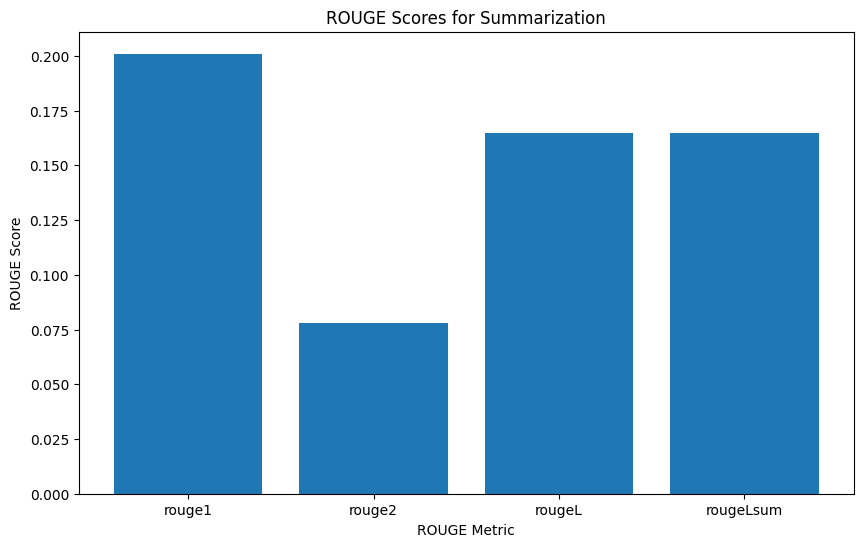

In [16]:
print(get_rouge_score(results, test_data.reference_summary.values))
# Calculate ROUGE scores
rouge_scores = get_rouge_score(results, test_data.reference_summary.values)

# Visualize ROUGE scores using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rouge_scores.keys(), rouge_scores.values())
plt.xlabel('ROUGE Metric')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Summarization')
plt.show()


---

Copyright © 2023 IBM. This notebook and its source code are released under the terms of the MIT License.